In [1]:
import scanpy as sc
import scanpy.external as sce
import anndata as ad
import numpy as np
import pandas as pd
import episcanpy.api as epi

STUD_PATH = '/mnt/workspace_stud/'
OUTPUT_PATH = f'{STUD_PATH}stud5/output/'

In [2]:
#INPUT_PATH = f'{OUTPUT_PATH}complete_liver_clpp17.h5ad'
#INPUT_PATH = f'{OUTPUT_PATH}complete_liver_clpp17_mc10.h5ad'
INPUT_PATH = f'{OUTPUT_PATH}complete_liver_clpp17_Z9a.h5ad'
TISSUE = INPUT_PATH.split('/')[-1].replace('_clpp17.h5ad', '')
TSV_OUT = f"{OUTPUT_PATH}clusters_{TISSUE}.tsv"

In [3]:
adata = ad.read(INPUT_PATH)
adata

AnnData object with n_obs × n_vars = 185734 × 503863
    obs: 'batch', 'nb_features'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    layers: 'binary', 'normalised'

In [4]:
epi.pp.log1p(adata)

In [5]:
#epi.pp.lazy(adata, min_dist=1.0, spread=2.0)
sc.pp.pca(adata, n_comps=50, svd_solver='arpack', use_highly_variable=False)
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50, method='umap', metric='euclidean')

## Clustering 
Choosing following best parameters:
- min_disst = 0.1
- spread = 2.0
- no_weights
- resolution = 0.7

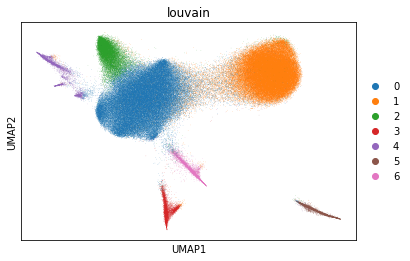

In [6]:
# min_dist=0.1, spread=2.0, no weights, resolution=0.7
sc.tl.umap(adata, 0.1, 2.0)
epi.tl.louvain(adata, resolution=0.7)
epi.pl.umap(adata, color=['louvain'], wspace=0.4)

In [ ]:
# min_dist=0.1, spread=3.0, no weights, resolution=0.7
sc.tl.umap(adata, 0.1, 3.0)
epi.tl.louvain(adata, resolution=0.7)
epi.pl.umap(adata, color=['louvain'], wspace=0.4)

In [ ]:
# min_dist=0.1, spread=2.0, no weights, no resolution
sc.tl.umap(adata, 0.1, 2.0)
epi.tl.louvain(adata)
epi.pl.umap(adata, color=['louvain'], wspace=0.4)

In [ ]:
# min_dist=0.1, spread=2.0, no weights, resolution=0.65
sc.tl.umap(adata, 0.1, 2.0)
epi.tl.louvain(adata, resolution=0.65)
epi.pl.umap(adata, color=['louvain'], wspace=0.4)

In [ ]:
# min_dist=0.1, spread=2.0, no weights, resolution=0.75
sc.tl.umap(adata, 0.1, 2.0)
epi.tl.louvain(adata, resolution=0.75)
epi.pl.umap(adata, color=['louvain'], wspace=0.4)

In [ ]:
# min_dist=0.1, spread=2.5, no weights, no resolution
sc.tl.umap(adata, 0.1, 2.5)
epi.tl.louvain(adata)
epi.pl.umap(adata, color=['louvain'], wspace=0.4)

In [ ]:
# min_dist=0.1, spread=2.0, no weights, resolution=0.6
sc.tl.umap(adata, 0.1, 2.0)
epi.tl.louvain(adata, resolution=0.6)
epi.pl.umap(adata, color=['louvain'], wspace=0.4)

In [ ]:
# min_dist=0.1, spread=2.0, no weights, resolution=0.8
sc.tl.umap(adata, 0.1, 2.0)
epi.tl.louvain(adata, resolution=0.8)
epi.pl.umap(adata, color=['louvain'], wspace=0.4)

## Rank Genes/Features

In [7]:
adata

AnnData object with n_obs × n_vars = 185734 × 503863
    obs: 'batch', 'nb_features', 'louvain'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'louvain', 'louvain_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'binary', 'normalised'
    obsp: 'distances', 'connectivities'

... storing 'transcript_annotation' as categorical


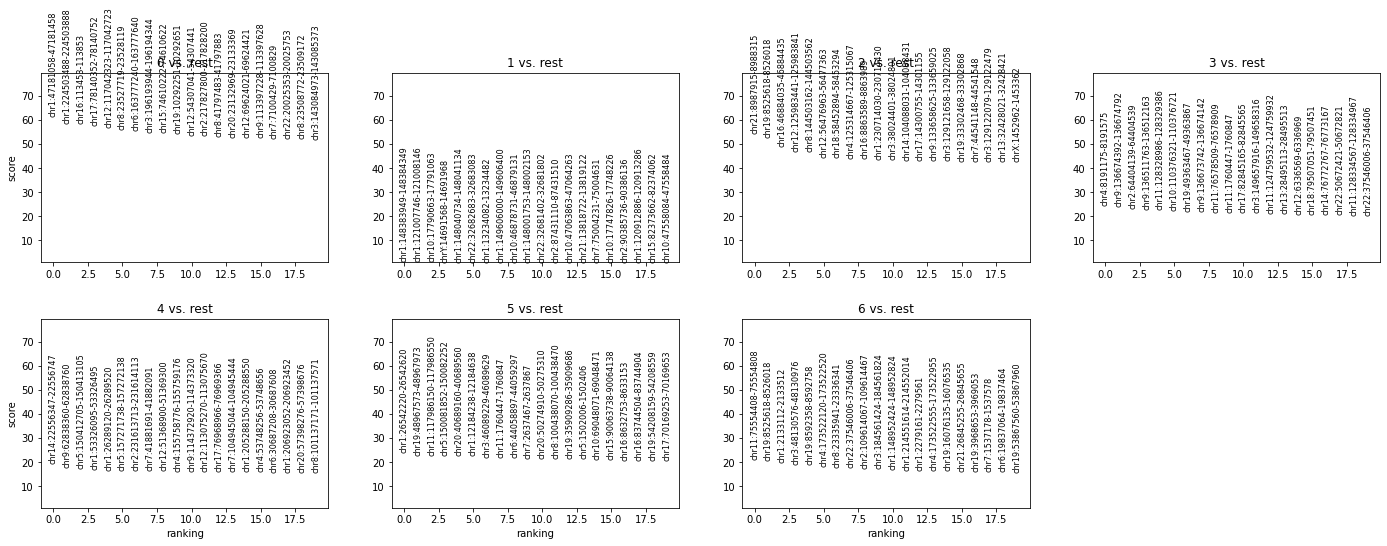

In [46]:
# rank_genes_groups expects logarithmized data. so run cluster with log before?
#epi.tl.rank_genes_groups(adata, groupby='bulk_labels', method='logreg')
epi.tl.rank_features(adata, groupby='louvain', omic='ATAC', n_features=None)
epi.pl.rank_feat_groups(adata)

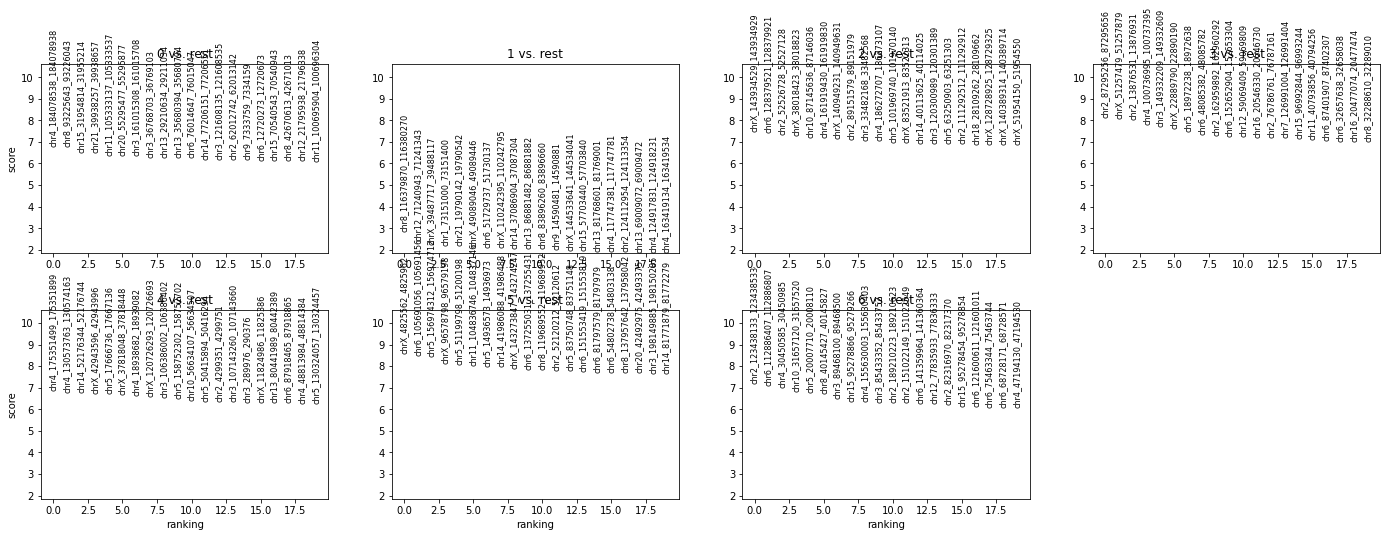

In [57]:
epi.tl.rank_features(adata, groupby='louvain', omic='ATAC', n_features=None, use_raw=False)
epi.pl.rank_feat_groups(adata)

In [37]:
raw = adata.var_names
raw

Index(['chr1_79215_79615', 'chr1_102755_103155', 'chr1_276109_276509',
       'chr1_631178_631578', 'chr1_794897_795297', 'chr1_804733_805133',
       'chr1_817901_818301', 'chr1_818585_818985', 'chr1_835499_835899',
       'chr1_850296_850696',
       ...
       'chrY_18979766_18980166', 'chrY_19055410_19055810',
       'chrY_19421022_19421422', 'chrY_19581054_19581454',
       'chrY_20444189_20444589', 'chrY_20699407_20699807',
       'chrY_20828004_20828404', 'chrY_20828469_20828869',
       'chrY_20997429_20997829', 'chrY_21021910_21022310'],
      dtype='object', length=503863)

In [41]:
names = []
for name in adata.var_names:
    names.append(name)
names

for i, n in enumerate(names):
    names[i] = adata.var_names[i].replace(':', '_')
    names[i] = names[i].replace('-', '_')
    tmp = n.split('_')
    if len(tmp) == 5:
        names[i] = '_'.join([tmp[0], tmp[3], tmp[4]])
    elif len(tmp) == 4:
        names[i] = '_'.join([tmp[0], tmp[2], tmp[3]])

adata.var_names = pd.Index(names)

In [58]:
adata.var_names

Index(['chr1_79215_79615', 'chr1_102755_103155', 'chr1_276109_276509',
       'chr1_631178_631578', 'chr1_794897_795297', 'chr1_804733_805133',
       'chr1_817901_818301', 'chr1_818585_818985', 'chr1_835499_835899',
       'chr1_850296_850696',
       ...
       'chrY_18979766_18980166', 'chrY_19055410_19055810',
       'chrY_19421022_19421422', 'chrY_19581054_19581454',
       'chrY_20444189_20444589', 'chrY_20699407_20699807',
       'chrY_20828004_20828404', 'chrY_20828469_20828869',
       'chrY_20997429_20997829', 'chrY_21021910_21022310'],
      dtype='object', length=503863)

In [59]:
for i, n in enumerate(adata.var_names):
    try:
        int(n.split('_')[1])
    except:
        print(f"Zeile: {i}, Pos: {n}")

In [87]:
# /mnt/workspace_stud/mbentse/homo_sapiens/homo_sapiens.104.mainChr.gtf
# /mnt/workspace_stud/stud5/gencode.v19.annotation.gtf
epi.tl.find_genes(adata,
           gtf_file='/mnt/workspace_stud/mbentse/homo_sapiens/homo_sapiens.104.mainChr.gtf',
           key_added='transcript_annotation',
           upstream=2000,
           feature_type='transcript',
           annotation='havana',
           raw=False)

In [88]:
adata.var['transcript_annotation']

chr1_79215_79615                          intergenic
chr1_102755_103155                        intergenic
chr1_276109_276509                        intergenic
chr1_631178_631578        MTATP8P1;MTCO1P12;MTCO2P12
chr1_794897_795297                         LINC01409
                                     ...            
chrY_20699407_20699807                    intergenic
chrY_20828004_20828404                    intergenic
chrY_20828469_20828869                    intergenic
chrY_20997429_20997829                    intergenic
chrY_21021910_21022310                    unassigned
Name: transcript_annotation, Length: 503863, dtype: object

In [78]:
adata

AnnData object with n_obs × n_vars = 185734 × 503863
    obs: 'batch', 'nb_features', 'louvain'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score', 'transcript_annotation'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'louvain', 'louvain_colors', 'rank_features_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'binary', 'normalised'
    obsp: 'distances', 'connectivities'

In [73]:
adata.var['transcript_annotation']

chr1_79215_79615          unassigned
chr1_102755_103155        unassigned
chr1_276109_276509        unassigned
chr1_631178_631578        unassigned
chr1_794897_795297        unassigned
                             ...    
chrY_20699407_20699807    unassigned
chrY_20828004_20828404    unassigned
chrY_20828469_20828869    unassigned
chrY_20997429_20997829    unassigned
chrY_21021910_21022310    unassigned
Name: transcript_annotation, Length: 503863, dtype: object

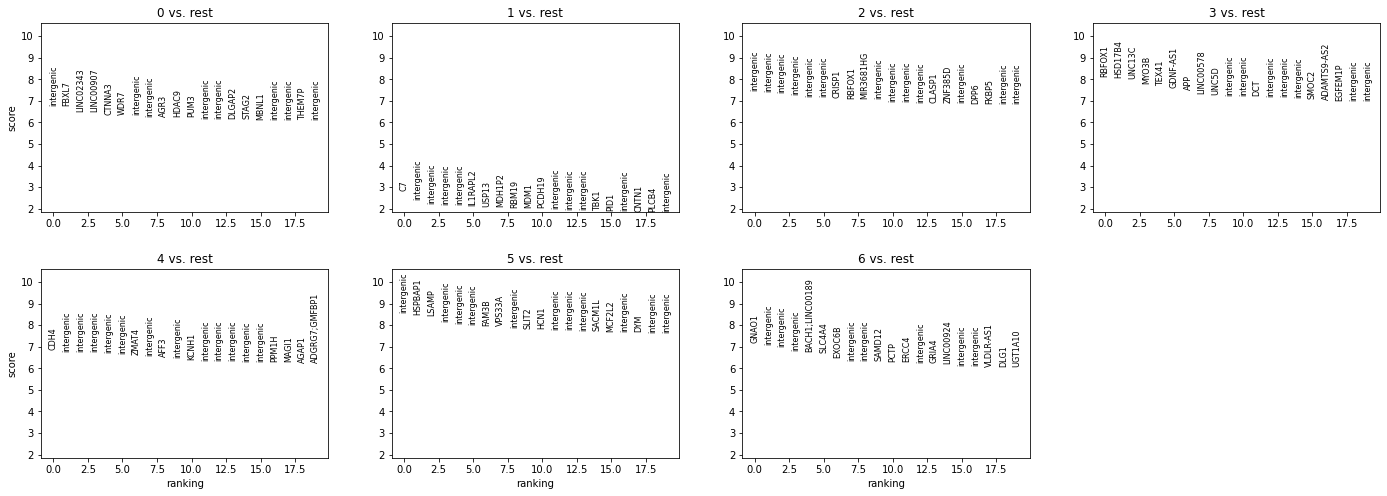

In [89]:
epi.pl.rank_feat_groups(adata, feature_symbols='transcript_annotation')

In [93]:
adata.raw = adata

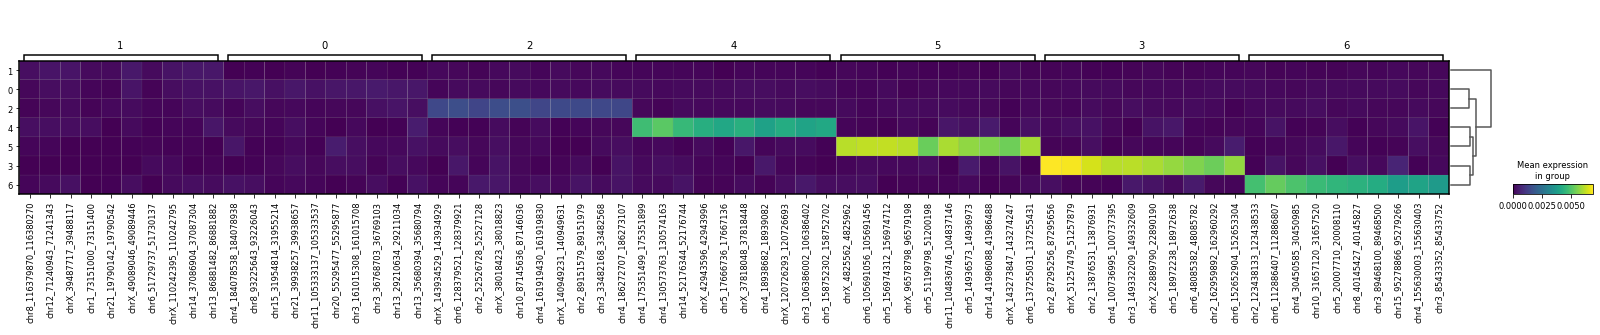

In [94]:
epi.pl.rank_feat_groups_matrixplot(adata)

In [ ]:
epi.pl.rank_feat_groups_dotplot(adata)

In [ ]:
len(adata.uns['rank_features_groups']['names'])